<a href="https://colab.research.google.com/github/Rushi2436/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Loading Dataset and Importing Modules**

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

# **IMPORT DATASET**

In [ ]:
df = pd.read_csv('/content/SeoulBikeData.csv',index_col=None, header=0, encoding='latin')

In [ ]:
## Viewing the data of top 5 rows 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
## Viewing the data of bottom 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
## shape of dataset
df.shape

(8760, 14)

In [ ]:
## Details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
## Description of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
## checking missing values in each column.
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **Exploratory Data Analysis and Preprocessing**

**Importance of EDA**

Determines impact of categorical and numerical variables 

# **Numerical Variables**

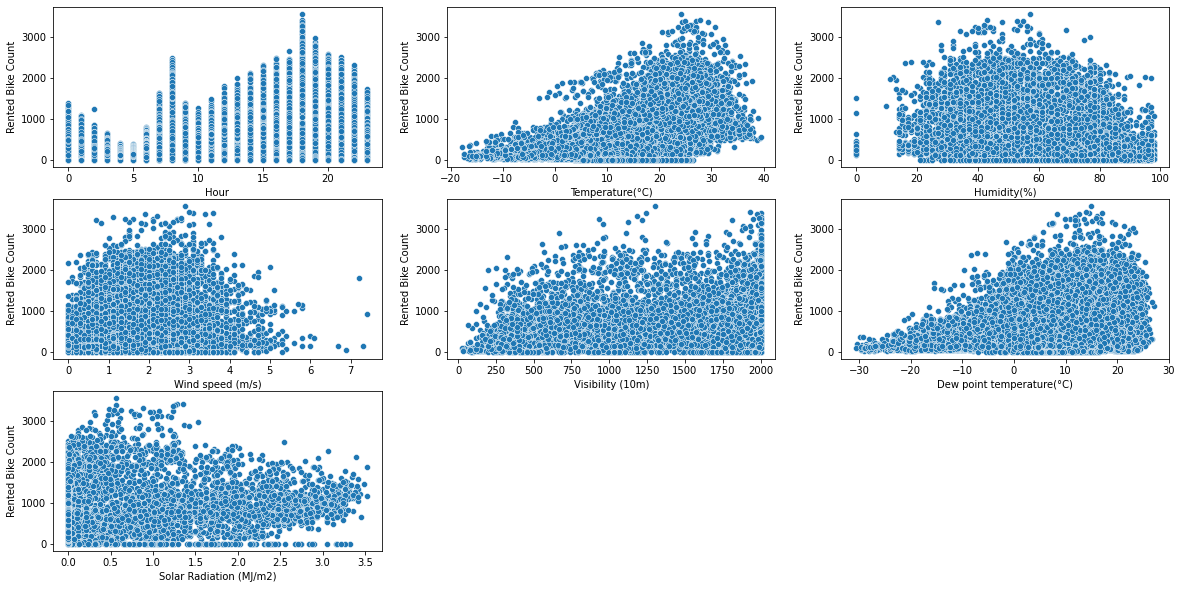

In [ ]:
# creating a list of nv 
list2=[i for i in df.describe().columns.to_list() if i not in ['Snowfall (cm)','Rainfall(mm)','Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,10))
for index,i in enumerate(list2):
  plt.subplot(3,3,index+1)
  sns.scatterplot(x=df[i],y=df['Rented Bike Count'])

**Observations drawn from the scatter plots:**



*  Demand for bikes is higher during morning hours and hours between 15 and 25
*  Demand is high when temperatures are high.

*  Demand is high during medium humidity.
*   Demand is high when windspeed is less and solar radiation is less.


*   Demand is high when visibility are high.



In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

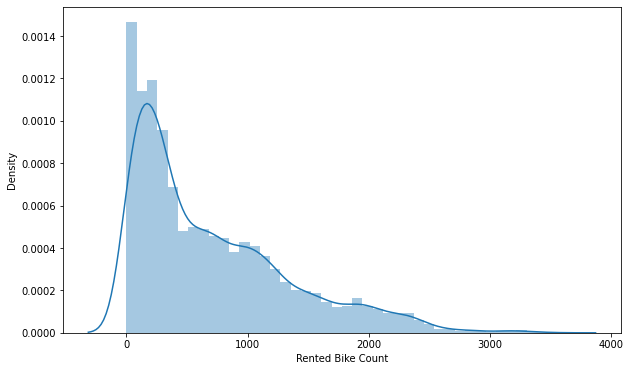

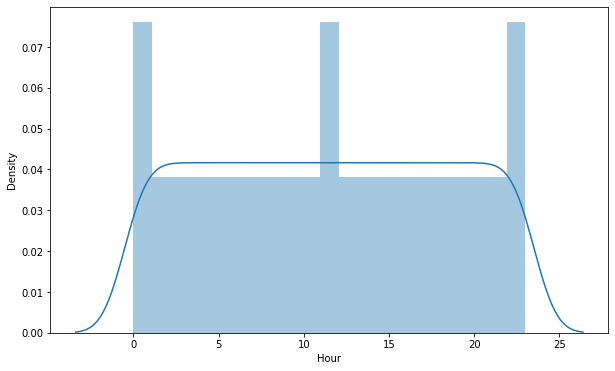

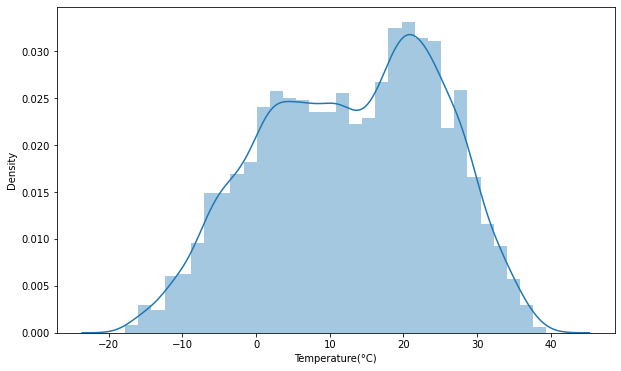

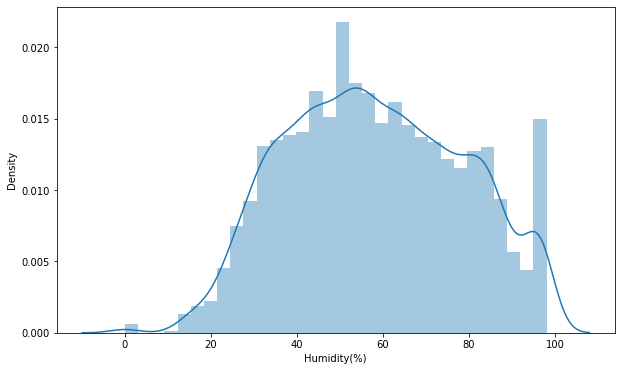

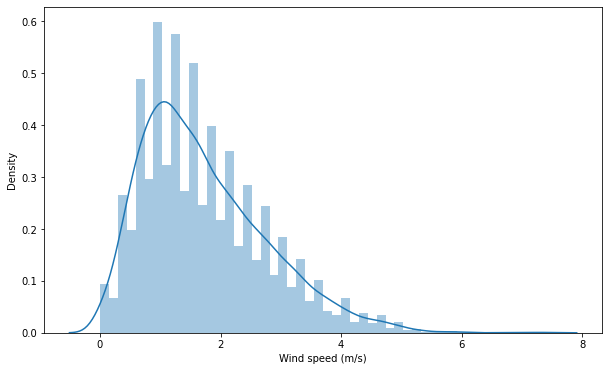

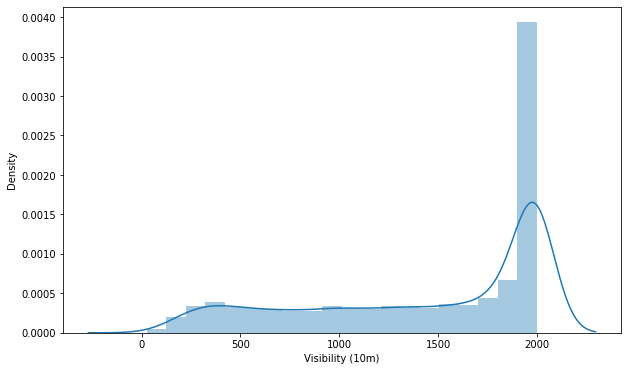

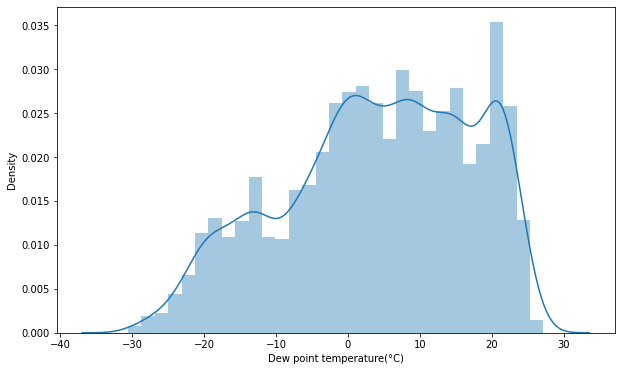

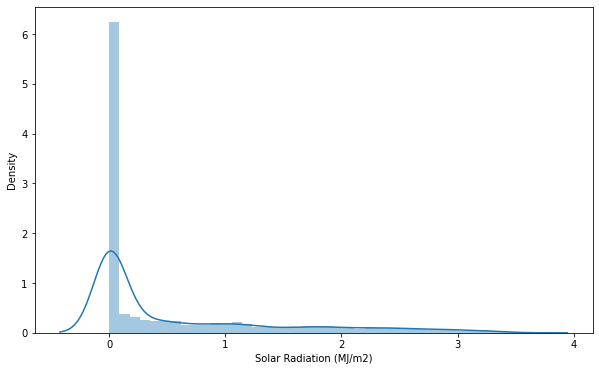

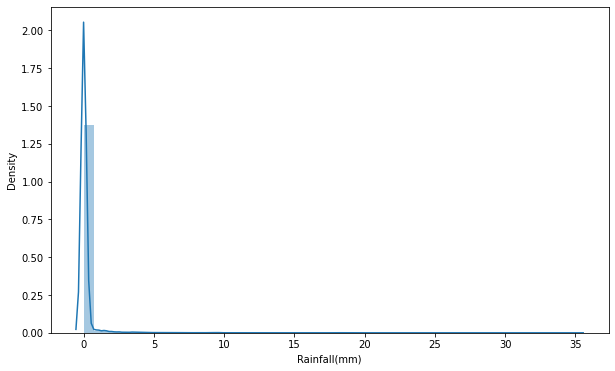

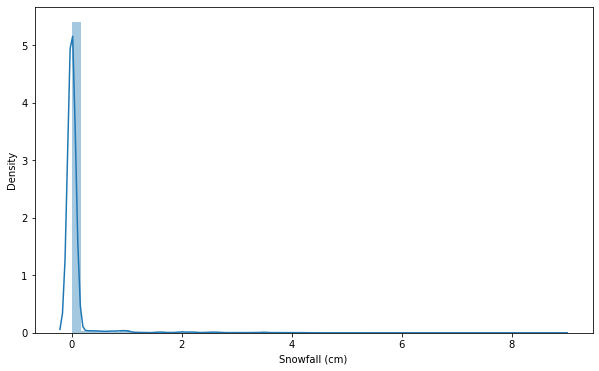

In [ ]:
# displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

# **Catagorical Variables**

Text(0, 0.5, 'rented bike count mean')

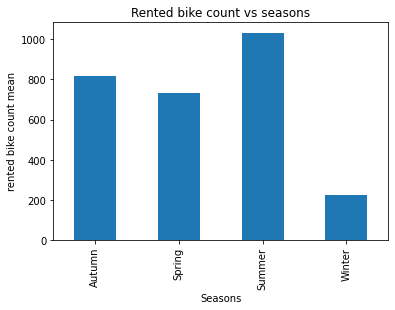

In [ ]:
# checking the mean rented bike count in each seasons.
df.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind='bar')
plt.title('Rented bike count vs seasons')
plt.ylabel('rented bike count mean')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

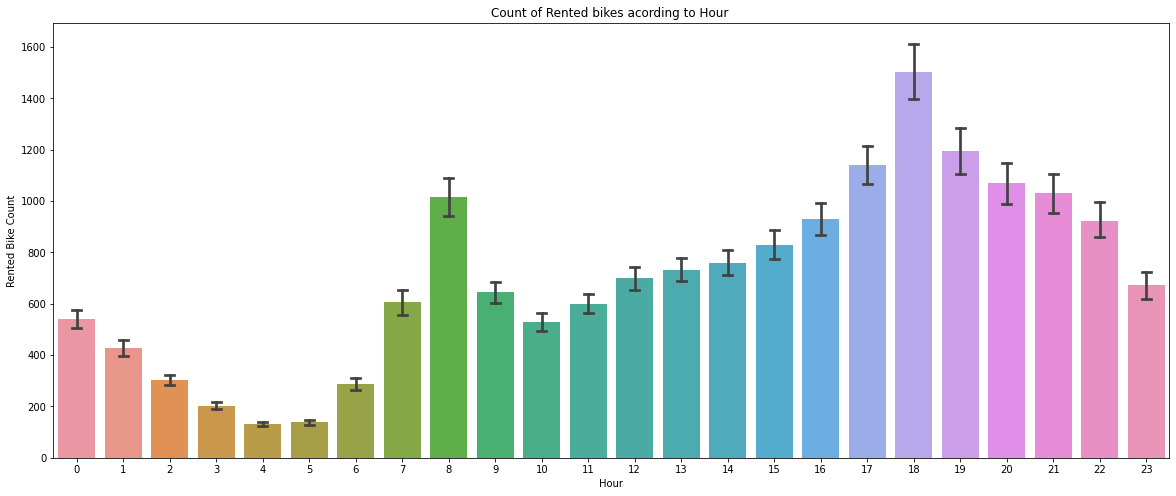

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

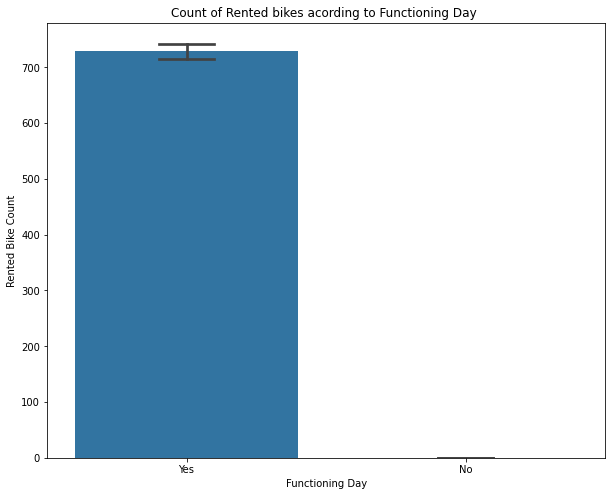

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

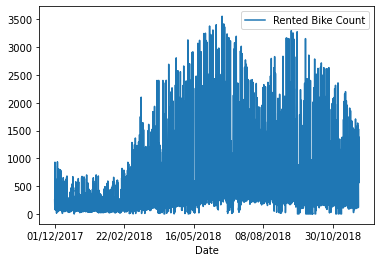

In [ ]:
# In this plot high values between 22/02/2018 to 08/08/2018
df.plot(x='Date',y='Rented Bike Count',kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

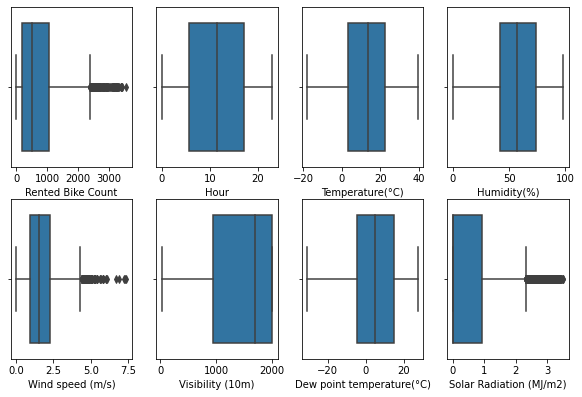

In [ ]:
# running a for loop over each of the variables
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

Text(0.5, 1.0, "Boxplot of 'rented bike count'")

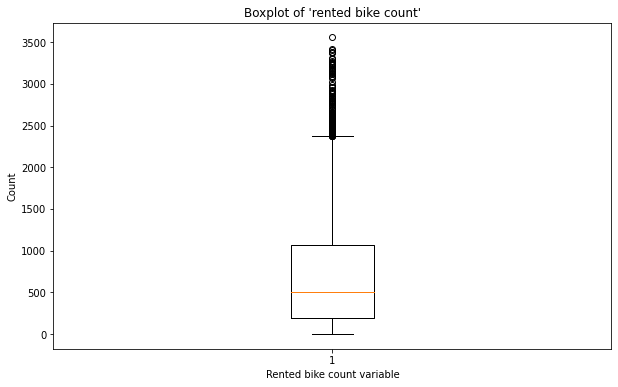

In [ ]:
# checking outliers using box plot
plt.figure(figsize=(10,6))
plt.boxplot(df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'rented bike count'")

In [ ]:
## Treating outliers with the hwlp of IQR
df_RentedBikeCount=df['Rented Bike Count']
df_RentedBikeCount.describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
IQR=1065-191
upper_whisker= int(1065+1.5*IQR)
Lower_whisker= int(191-1.5*IQR)
df_without_outlier = df[Lower_whisker <= df['Rented Bike Count'] ]
df_without_outlier= df[df['Rented Bike Count'] <=upper_whisker]
df_without_outlier

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


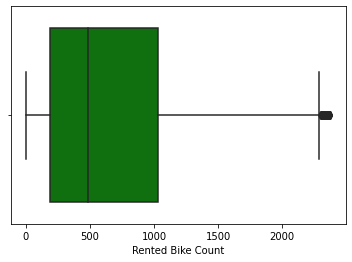

In [ ]:
sns.boxplot(df_without_outlier['Rented Bike Count'],color='green')

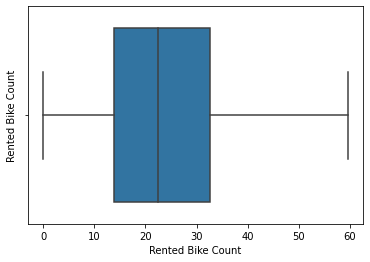

In [ ]:
# Other type to remove Outliers 
# Applying sqrt on Rented Bike Count 

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))

In above boxplot have no outliers..

Text(0.5, 1.0, 'Heatmap')

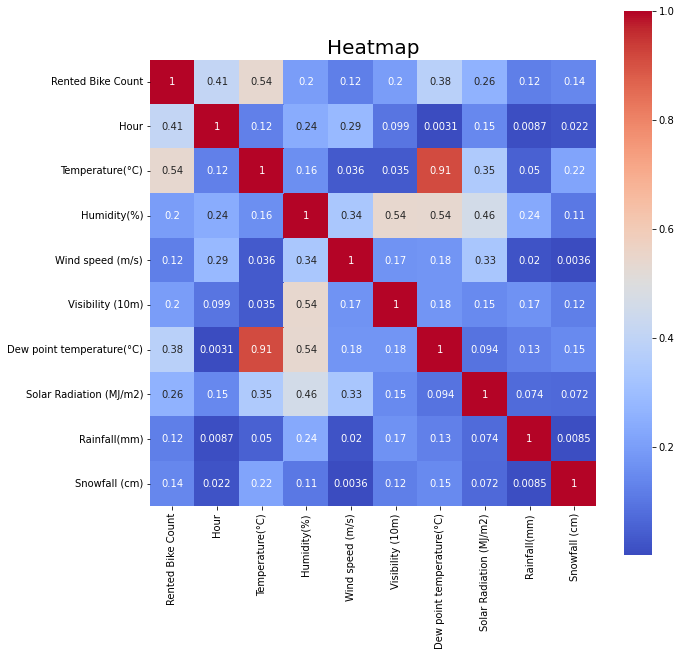

In [ ]:
## finding the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm', annot=True, square=True)
plt.title('Heatmap',fontsize=(20))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Date_01/02/2018,Date_01/03/2018,Date_01/04/2018,Date_01/05/2018,Date_01/06/2018,Date_01/07/2018,Date_01/08/2018,Date_01/09/2018,Date_01/10/2018,Date_01/11/2018,Date_01/12/2017,Date_02/01/2018,Date_02/02/2018,Date_02/03/2018,Date_02/04/2018,Date_02/05/2018,Date_02/06/2018,Date_02/07/2018,Date_02/08/2018,Date_02/09/2018,Date_02/10/2018,Date_02/11/2018,Date_02/12/2017,Date_03/01/2018,Date_03/02/2018,Date_03/03/2018,Date_03/04/2018,Date_03/05/2018,Date_03/06/2018,Date_03/07/2018,...,Date_28/07/2018,Date_28/08/2018,Date_28/09/2018,Date_28/10/2018,Date_28/11/2018,Date_28/12/2017,Date_29/01/2018,Date_29/03/2018,Date_29/04/2018,Date_29/05/2018,Date_29/06/2018,Date_29/07/2018,Date_29/08/2018,Date_29/09/2018,Date_29/10/2018,Date_29/11/2018,Date_29/12/2017,Date_30/01/2018,Date_30/03/2018,Date_30/04/2018,Date_30/05/2018,Date_30/06/2018,Date_30/07/2018,Date_30/08/2018,Date_30/09/2018,Date_30/10/2018,Date_30/11/2018,Date_30/12/2017,Date_31/01/2018,Date_31/03/2018,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


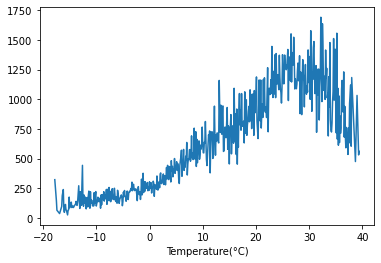

In [ ]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

# **MODELING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# **Train Test Split:-**

In [ ]:
X = df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Date_01/02/2018,Date_01/03/2018,Date_01/04/2018,Date_01/05/2018,Date_01/06/2018,Date_01/07/2018,Date_01/08/2018,Date_01/09/2018,Date_01/10/2018,Date_01/11/2018,Date_01/12/2017,Date_02/01/2018,Date_02/02/2018,Date_02/03/2018,Date_02/04/2018,Date_02/05/2018,Date_02/06/2018,Date_02/07/2018,Date_02/08/2018,Date_02/09/2018,Date_02/10/2018,Date_02/11/2018,Date_02/12/2017,Date_03/01/2018,Date_03/02/2018,Date_03/03/2018,Date_03/04/2018,Date_03/05/2018,Date_03/06/2018,Date_03/07/2018,Date_03/08/2018,...,Date_28/07/2018,Date_28/08/2018,Date_28/09/2018,Date_28/10/2018,Date_28/11/2018,Date_28/12/2017,Date_29/01/2018,Date_29/03/2018,Date_29/04/2018,Date_29/05/2018,Date_29/06/2018,Date_29/07/2018,Date_29/08/2018,Date_29/09/2018,Date_29/10/2018,Date_29/11/2018,Date_29/12/2017,Date_30/01/2018,Date_30/03/2018,Date_30/04/2018,Date_30/05/2018,Date_30/06/2018,Date_30/07/2018,Date_30/08/2018,Date_30/09/2018,Date_30/10/2018,Date_30/11/2018,Date_30/12/2017,Date_31/01/2018,Date_31/03/2018,Date_31/05/2018,Date_31/07/2018,Date_31/08/2018,Date_31/10/2018,Date_31/12/2017,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 378)
(2190, 378)


In [ ]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train 

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.57418668,
         0.23069934,  0.17946416],
       [ 0.36544652,  0.93615918, -0.54181953, ..., -0.57418668,
         0.23069934,  0.17946416],
       [ 1.08889586, -1.65916064, -1.22968527, ...,  1.74159386,
         0.23069934,  0.17946416],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.57418668,
         0.23069934,  0.17946416],
       [-1.66021162, -0.37401835,  0.04777967, ..., -0.57418668,
         0.23069934,  0.17946416],
       [ 1.23358573, -0.47415931,  1.22697808, ..., -0.57418668,
         0.23069934,  0.17946416]])

# **LINEAR REGRESSION**

In [ ]:
regressor= LinearRegression().fit(X_train, y_train)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

23.53351955767314

In [ ]:
regressor.coef_

array([ 3.03645582e+00,  7.71484461e+00, -3.26575105e+00,  3.11461271e-01,
        1.84831126e+00,  3.38123072e+00, -1.65698833e+00, -8.51065888e-01,
        4.20728908e-01,  1.06671549e+12, -2.05703412e+12, -1.12688618e+12,
       -1.93968634e+12, -2.16183636e+12, -2.10433759e+12, -2.10433759e+12,
        6.35505905e+11,  6.53880284e+11,  6.71746862e+11,  9.87812817e+11,
        9.87812817e+11,  9.01952024e+11, -1.15462657e+12, -1.06922130e+12,
       -9.09010026e+11, -1.71897098e+12, -2.32572249e+12, -1.98429129e+12,
        6.53880284e+11,  6.53880284e+11,  6.35505905e+11,  9.31460987e+11,
        1.06671549e+12,  1.01480374e+12, -1.03917562e+12, -1.09843663e+12,
       -1.15462657e+12, -2.27242395e+12, -2.16183636e+12, -2.16183636e+12,
        7.06109718e+11, -3.24548853e+11,  6.53880284e+11,  9.87812817e+11,
        9.87812817e+11,  9.87812817e+11, -1.06922130e+12, -1.06922130e+12,
       -1.00822536e+12, -2.16183636e+12, -2.04520460e+12, -1.98429129e+12,
        5.97044942e+11,  

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented Bike Count, Length: 6570, dtype: float64

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted Rented Bike Count on the test data
y_pred

array([23.65827542, 25.98249417, 15.71296292, ..., 41.05980278,
        4.14133191, 36.50511528])

In [ ]:
# Actual Rented Bike Count on test data
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented Bike Count, Length: 2190, dtype: float64

In [ ]:
#get the X_train and X-test value
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [ ]:
#for Train dataset
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print('MSE_lr',MSE_lr)

RMSE_lr=np.sqrt(MSE_lr)
print('RMSE_lr',RMSE_lr)

r2_lr= r2_score(y_train, y_pred_train)
print('r2_lr',r2_lr)

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 ",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE_lr 36.78246379661084
RMSE_lr 6.064854804248066
r2_lr 0.761138374844964
Adjusted R2  0.7112821107319858


In [ ]:
# For test dataset
MSE_lr= mean_squared_error(y_test, y_pred_test)
print('MSE',MSE_lr)

RMSE_lr=np.sqrt(MSE_lr)
print("RMSE",RMSE_lr)

r2_lr= r2_score((y_test), (y_pred_test))
print('R2',r2_lr)

Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2',Adjusted_R2_lr )

MSE 42.18087616956799
RMSE 6.4946806056624515
R2 0.7329756500346887
Adjusted R2 0.6772411363478374


Looks like our r2 score value is 0.73 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

Text(0.5, 0, 'Actual Values')

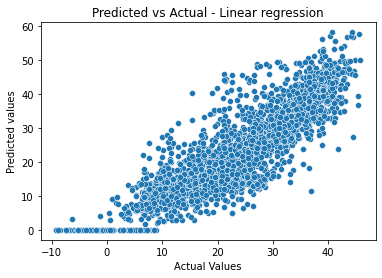

In [ ]:
#visualizing the predictions
sns.scatterplot(x=y_pred,y=y_test)
plt.title('Predicted vs Actual - Linear regression')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

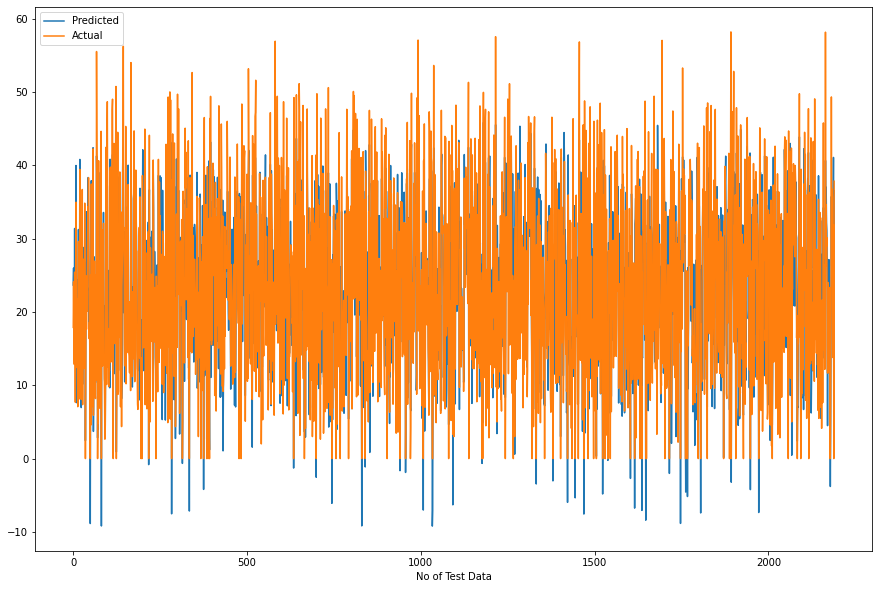

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 1.0, 'Predicted values vs residuals - Heteroscedasticity(LR)')

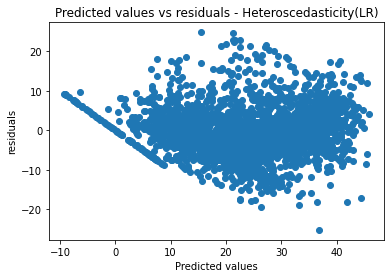

In [ ]:
# checking for heteroscedasticity
plt.scatter(y_pred,y_test-y_pred)
plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.title('Predicted values vs residuals - Heteroscedasticity(LR)')

# **REGULARIZATION**

# **LASSO REGRESSION**

In [ ]:
# Making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

# Training the model
  model.fit(X_train,y_train)

  # Predicting the values
  pred = model.predict(X_test)

In [ ]:
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6095385343654355 0.6039985724300314


In [ ]:
# Calculate the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
#for Train dataset
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE' ,MSE_lasso)

RMSE_lasso=np.sqrt(MSE_lasso)
print('RMSE',RMSE_lasso)

r2_lasso= r2_score(y_train, y_pred_train_lasso)
print('R2',r2_lasso)

Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 60.980528636797175
RMSE 7.809003050120878
R2 0.6039985724300314
Adjusted R2 0.7112821107319858


In [ ]:
# For test dataset
MSE_lasso= mean_squared_error(y_test, y_pred_test_lasso)
print('MSE',MSE_lasso)

RMSE_lasso=np.sqrt(MSE_lasso)
print('RMSE',RMSE_lasso)

r2_lasso= r2_score((y_test), (y_pred_test_lasso))
print('R2',r2_lasso)

Adjusted_R2_lasso = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2',Adjusted_R2_lasso )

MSE 61.67979337112584
RMSE 7.85364841147895
R2 0.6095385343654355
Adjusted R2 0.6772411363478374


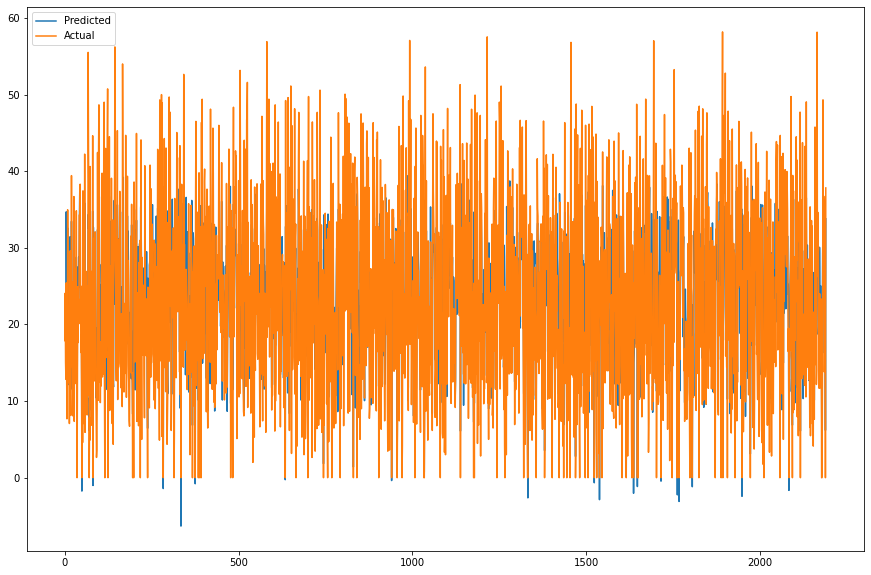

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

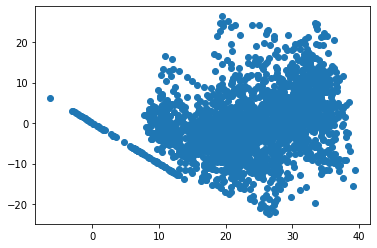

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

### **LASSO REGRESSION WITH GRIDSEARCHCV**

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.784e+04, tolerance: 6.797e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.964e+04, tolerance: 6.730e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -42.61260003470027


In [ ]:
y_pred_test_lasso_grid = lasso_regressor.predict(X_test)
y_pred_train_lasso_grid = lasso_regressor.predict(X_train)

In [ ]:
#for Train dataset
MSE_lg= mean_squared_error((y_train), (y_pred_train_lasso_grid ))
print('MSE',MSE_lg)

RMSE_lg=np.sqrt(MSE_lg)
print('RMSE',RMSE_lg)

r2_lg= r2_score(y_train, y_pred_train_lasso_grid )
print('R2',r2_lg)

Adjusted_R2_lg = (1-(1-r2_score(y_train, y_pred_train_lasso_grid ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_train_lasso_grid ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 36.91763241999817
RMSE 6.075988184649322
R2 0.7602606033821606
Adjusted R2 0.7102211268931804


In [ ]:
#for Test dataset
MSE_lg  = mean_squared_error((y_test), (y_pred_test_lasso_grid))
print('MSE' , MSE_lg)

RMSE_lg = np.sqrt(MSE_lg)
print('RMSE' ,RMSE_lg)

r2_lg= r2_score((y_test), (y_pred_test_lasso_grid))
print('R2' ,r2_lg)

print('Adjusted R2',1-(1-r2_score((y_test),(y_pred_test_lasso_grid)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE 42.20804005756753
RMSE 6.4967715103401575
R2 0.7328036901278709
Adjusted R2 0.6770332842020483


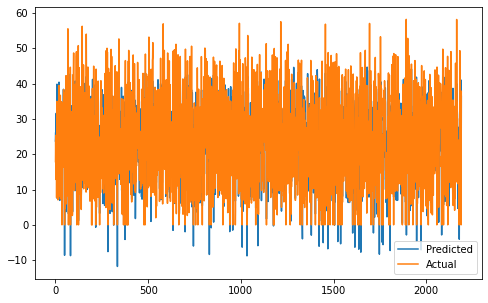

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_lasso_grid))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

In [ ]:
ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.7611472553613909

In [ ]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#for Train dataset
MSE_rg= mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE',MSE_rg)

RMSE_rg=np.sqrt(MSE_rg)
print('RMSE',RMSE_rg)

r2_rg= r2_score(y_train, y_pred_train_ridge)
print('R2',r2_rg)

Adjusted_R2_rg = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 36.781096279858176
RMSE 6.064742062104387
R2 0.7611472553613909
Adjusted R2 0.7112821107319858


In [ ]:
#For Test Dataset
MSE_rg = mean_squared_error(y_test,y_pred_test_ridge)
print('MSE' , MSE_rg)
    
RMSE_rg = np.sqrt(MSE_rg)
print('RMSE' ,RMSE_rg)

r2_rg = r2_score(y_test,y_pred_test_ridge)
print('R2' ,r2_rg)

adj_r2=1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2',adj_r2)

MSE 42.1915888223562
RMSE 6.495505278448799
R2 0.7329078340145645
Adjusted R2 0.6771591654654233


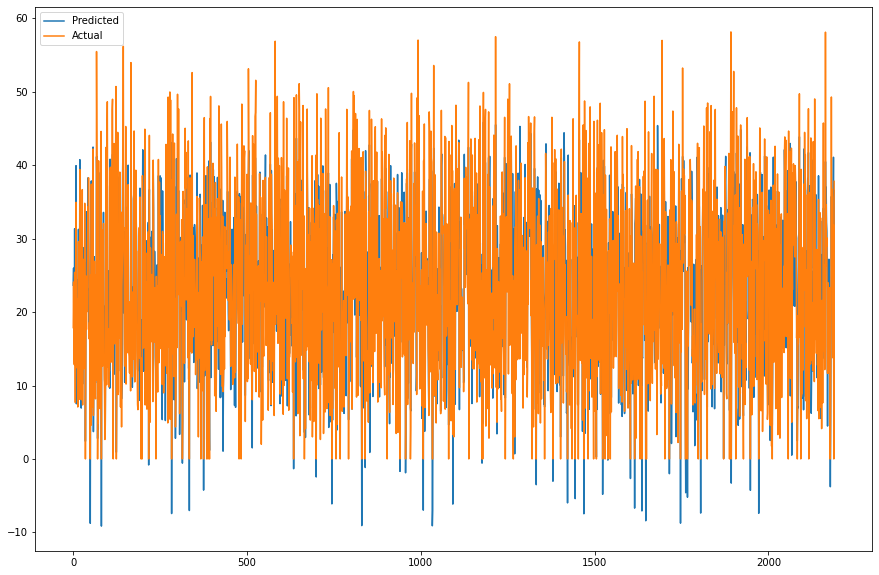

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

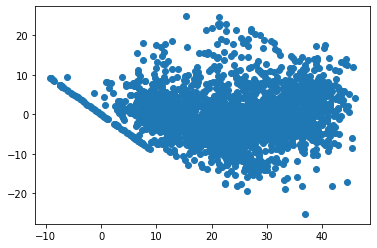

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge))

# **RIDGE REGRESSION WITH GRIDSEARCHCV**

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -42.660825468571865


In [ ]:
#Model Prediction
y_pred_test_ridge_gridsearchcv = ridge_regressor.predict(X_test)
y_pred_train_ridge_gridsearchcv = ridge_regressor.predict(X_train)

In [ ]:
#For Train Dataset
MSE_rg= mean_squared_error((y_train), y_pred_train_ridge_gridsearchcv )
print('MSE',MSE_rg)

RMSE_rg=np.sqrt(MSE_rg)
print('RMSE',RMSE_rg)

r2_rg = r2_score(y_train,y_pred_train_ridge_gridsearchcv)
print('R2' ,r2_rg)

Adjusted_R2_rg = (1-(1-r2_score(y_train, y_pred_train_ridge_gridsearchcv ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,y_pred_train_ridge_gridsearchcv ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 36.80812306764854
RMSE 6.0669698423223215
R2 0.7609717461162784
Adjusted R2 0.7110807025116141


In [ ]:
#For Test Dataset
MSE_rg  = mean_squared_error((y_test),(y_pred_test_ridge_gridsearchcv))
print('MSE' , MSE_rg)

RMSE_rg = np.sqrt(MSE_rg)
print('RMSE' ,RMSE_rg)

r2 = r2_score((y_test), (y_pred_test_ridge_gridsearchcv))
print('R2',r2)

Adjusted_R2_rg = (1-(1-r2_score((y_test), (y_pred_test_ridge_gridsearchcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))) )
print('Adjusted R2',1-(1-r2_score((y_test), (y_pred_test_ridge_gridsearchcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE 42.23639850057926
RMSE 6.498953646594139
R2 0.7326241681383137
Adjusted R2 0.6768162915818712


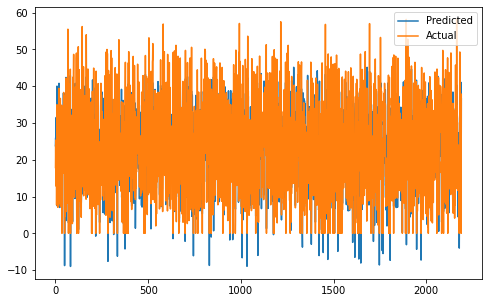

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge_gridsearchcv))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

In [ ]:
decision_tree_regressor= DecisionTreeRegressor(criterion='mse', random_state=100, max_depth=4, min_samples_leaf=1)

In [ ]:
decision_tree_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4, random_state=100)

In [ ]:
y_pred_decisiont_test = decision_tree_regressor.predict(X_test)

In [ ]:
y_pred_decisiont_train = decision_tree_regressor.predict(X_train)

In [ ]:
#For Train Dataset
MSE_dt= mean_squared_error((y_train), (y_pred_decisiont_train))
print('MSE',MSE_dt)

RMSE_dt=np.sqrt(MSE_dt)
print('RMSE',RMSE_dt)

r2_dt= r2_score(y_train, y_pred_decisiont_train)
print('R2',r2_dt)

Adjusted_R2_dt = (1-(1-r2_score(y_train, y_pred_decisiont_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_decisiont_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 48.58781499601616
RMSE 6.970496036582774
R2 0.6844756099848318
Adjusted R2 0.6186179515498602


In [ ]:
#For Test Dataset
MSE_dt = mean_squared_error((y_test),(y_pred_decisiont_test))
print('MSE' , MSE_dt)

RMSE_dt = np.sqrt(MSE_dt)
print('RMSE' ,RMSE_dt)

r2_dt = r2_score((y_test), (y_pred_decisiont_test))
print('R2',r2_dt)

Adjusted_R2_dt = (1-(1-r2_score(y_test, y_pred_decisiont_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_decisiont_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 49.595583257997745
RMSE 7.042413170071588
R2 0.6860371432926317
Adjusted R2 0.6205054150566376


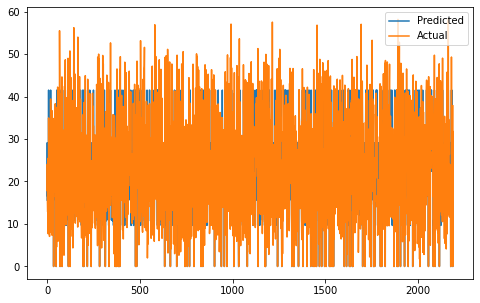

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_decisiont_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE WITH GRIDSEARCHCV**

In [ ]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [ ]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)

In [ ]:
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.83 with max depth = 8.00 
 
The best R2 test score is : 0.84
 with max depth = 8.00
 


In [ ]:
y_pred_decision_test = gridSearch_decisionTree.predict(X_test)

In [ ]:
y_pred_decision_train = gridSearch_decisionTree.predict(X_train)

In [ ]:
#For Train Dataset
MSE_dt= mean_squared_error((y_train), (y_pred_decision_train))
print('MSE',MSE_dt)

RMSE_dt=np.sqrt(MSE_dt)
print('RMSE',RMSE_dt)

r2_dt= r2_score(y_train, y_pred_decision_train)
print('R2',r2_dt)

Adjusted_R2_dt = (1-(1-r2_score(y_train, y_pred_decision_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train, y_pred_decision_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 20.32045833983486
RMSE 4.507821906401678
R2 0.8680409846989263
Adjusted R2 0.8404979102738541


In [ ]:
#For Test Dataset
MSE_dt = mean_squared_error((y_test),(y_pred_decision_test))
print('MSE' , MSE_dt)

RMSE_dt = np.sqrt(MSE_dt)
print('RMSE' ,RMSE_dt)

r2_dt = r2_score((y_test), (y_pred_decision_test))
print('R2',r2_dt)

Adjusted_R2_dt = (1-(1-r2_score(y_test, y_pred_decision_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_decision_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 25.277024606551198
RMSE 5.027626140292375
R2 0.8399848064443219
Adjusted R2 0.8065857213178469


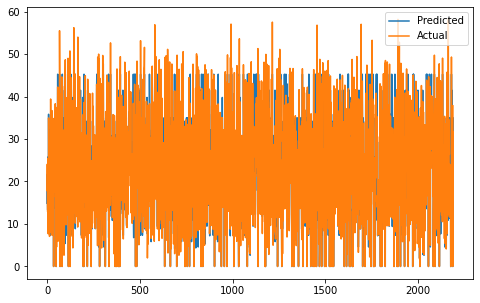

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_decision_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestRegressor(n_estimators=70, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=70, random_state=0)

In [ ]:
y_pred_random_forest_test = random_forest.predict(X_test)

In [ ]:
y_pred_random_forest_train = random_forest.predict(X_train)

In [ ]:
#For Train Dataset
MSE_rf= mean_squared_error((y_train), (y_pred_random_forest_train))
print('MSE',MSE_rf)

RMSE_rf=np.sqrt(MSE_rf)
print('RMSE',RMSE_rf)

r2_rf= r2_score(y_train, y_pred_random_forest_train)
print('R2',r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_random_forest_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,y_pred_random_forest_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 1.985147618832419
RMSE 1.4089526673499075
R2 0.9871086507682323
Adjusted R2 0.9844179108402322


In [ ]:
#For Test Dataset
MSE_rf = mean_squared_error((y_test),(y_pred_random_forest_test))
print('MSE' , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print('RMSE' ,RMSE_rf)

r2_rf = r2_score((y_test), (y_pred_random_forest_test))
print('R2',r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_test, y_pred_random_forest_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_random_forest_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 14.642331886474775
RMSE 3.826530005955105
R2 0.9073073034745754
Adjusted R2 0.8879600702958839


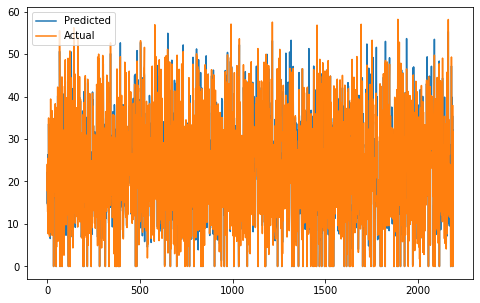

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_random_forest_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST WITH GRIDSEARCHCV**

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
# predicting for both train and test
y_pred_random_gridsearchcv_train=grid_search.predict(X_train)
y_pred_random_gridsearchcv_test=grid_search.predict(X_test)

In [ ]:
#For Train Dataset
MSE_rf= mean_squared_error((y_train), (y_pred_random_gridsearchcv_train))
print('MSE',MSE_rf)

RMSE_rf=np.sqrt(MSE_rf)
print('RMSE',RMSE_rf)

r2_rf= r2_score(y_train, y_pred_random_gridsearchcv_train)
print('R2',r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_train,  y_pred_random_gridsearchcv_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,  y_pred_random_gridsearchcv_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 55.604275141657226
RMSE 7.456827417987976
R2 0.6389114225913328
Adjusted R2 0.5635434036733449


In [ ]:
#For Test Dataset
MSE_rf = mean_squared_error((y_test),(y_pred_random_gridsearchcv_test))
print('MSE', MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print('RMSE' ,RMSE_rf)

r2_rf= r2_score((y_test), (y_pred_random_gridsearchcv_test))
print('R2' ,r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(y_test,  y_pred_random_gridsearchcv_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_random_gridsearchcv_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 61.63568372562078
RMSE 7.850839682837803
R2 0.6098177687125561
Adjusted R2 :  0.5283771925520626


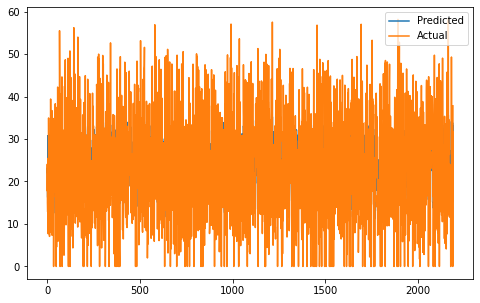

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_random_gridsearchcv_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **XGBOOST**

In [ ]:
import xgboost as xg
from xgboost import XGBRegressor
from xgboost import XGBClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 1000, seed = 123)

In [ ]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[15:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000, seed=123)

In [ ]:
# Predict the model
y_pred_xgb_train = xgb_r.predict(X_train)
y_pred_xgb_test = xgb_r.predict(X_test)

In [ ]:
#For Train Dataset
MSE_xgb= mean_squared_error((y_train), (y_pred_xgb_train))
print('MSE',MSE_xgb)

RMSE_xgb=np.sqrt(MSE_xgb)
print('RMSE',RMSE_xgb)

r2_xgb= r2_score(y_train, y_pred_xgb_train)
print('R2',r2_xgb)

Adjusted_R2_xgb = (1-(1-r2_score(y_train,  y_pred_xgb_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',1-(1-r2_score(y_train,  y_pred_xgb_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE 8.079465993289185
RMSE 2.842440147705697
R2 0.9475327594091258
Adjusted R2 0.9365815628639296


In [ ]:
#For Test Dataset
MSE_xgb = mean_squared_error((y_test),(y_pred_xgb_test))
print('MSE' , MSE_xgb)

RMSE_xgb = np.sqrt(MSE_xgb)
print('RMSE' ,RMSE_xgb)

r2_xgb= r2_score((y_test), (y_pred_xgb_test))
print('R2' ,r2_xgb)

Adjusted_R2_xgb = (1-(1-r2_score(y_test,  y_pred_xgb_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2',(1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 14.116600461737848
RMSE 3.757206470469496
R2 0.9106354252372049
Adjusted R2 0.8919828524816352


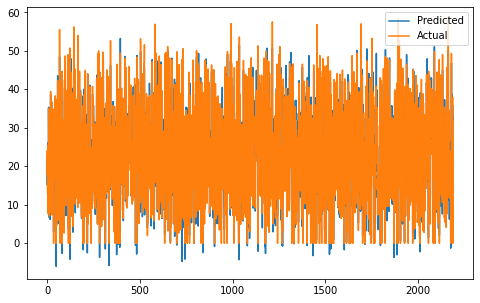

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_xgb_test))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.5789721050000737

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3.55455034191913e+81
RMSE : 5.962004983157202e+40
R2 : 0.5715399009900914
Adjusted R2 :  -2.7198643872171006e+79
